## California Housing Data Analysis

The is the anlysis of the california housing data. 

In [2]:
import pandas as pd
import numpy as np
import os

#variable to store path to data
HOUSING_PATH=""

### Loading and Exploring the data: 

Now we load the housing data and see a few of the functions to see what the data is all about.
* The `describe()` method shows a summary of the numerical attributes.
* `head()` and `tail()` shows the top and the bottom parts of the data.
* The `info()` method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values 

In [3]:
#function to load housing data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
#Loading and seeing housing data
housing=load_housing_data()

#housing.head()
#housing.tail()
#housing.info()
housing.describe()
#housing["ocean_proximity"].value_counts()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We find that there is only one catagorical attribute **ocean_proximity** others are all numerical attributes with 5 different types as found from the `value_counts()` function. From the `describe` function we get an idea that some the variables such as **median_income, median_house_value** and **housing_median_age** are capped at certain values. It also gives us an idea of the units, for exmaple the **median_house_value** or **median_income** are not in $\$$. So next we plot the numerical attributes to get a clearer picture.

### Plotting the values

Another way to get a feel of the numerical attribute of data we are dealing with, is to plot a
histogram for each.


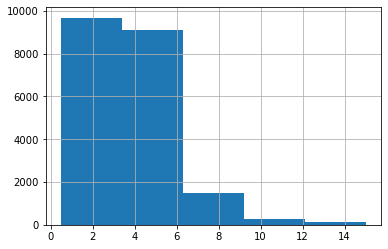

In [7]:
#%matplotlib inline 
#only in a Jupyter notebook
import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20,15))
housing["median_income"].hist(bins=5)
#plt.savefig('data_descriptor.jpg')
plt.show()
plt.close('all')

We can certainly notice the values are neither normalised and are squwed to the right, that is to say the right tail is heavy.

### Seperating the Test and the Training set

Random sampling can be done with the `train_test_split` function from the `sklearn` package. The docs can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Although this might create problems in some areas when the data comes from a stratified polulation.

**stratified sampling:** the population is divided into homogeneous subgroups called strata,
and the right number of instances is sampled from each stratum to guarantee that the
test set is representative of the overall population.

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### Creating a strata for the median_income 

Below we will be classifying the **median_income** in to another attribute **income_cat**. Any value more than $5$ is catagorised as a $5$.

In [14]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    